In [1]:
from pathlib import Path
import sys

# Compute the absolute path of the '../code' directory relative to the current working directory
code_dir = (Path.cwd() / '..' / 'code').resolve()

# Insert this path at the beginning of sys.path
sys.path.insert(0, str(code_dir))

from run import run_instance, print_results, iteration_run, plot

294


In [2]:
# Example Single Usage
# Change the number of ships or time slots a view the corresponding timeslot
number_ships = 3
number_time_slots = 3
NUM_READS = 25 # Number of of iterations of the simulated annealer

results = run_instance(number_ships, number_time_slots, NUM_READS)
print_results(number_ships, number_time_slots, results)

Instance with 3 ships (and 3 time slots):
  Optimized total water cost = 84.0
  Baseline total water cost   = 105
  Number of feasible solutions: 25
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 1
  Length of ships: [352.86 289.6  188.78]
  Benefit of ships: [6.5 6.5 5.7]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [2]
  Time slot 2 (Lock type: Panamax_B): Ships [3]
  Time slot 3 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------



## Mutiple Iterations and Comparison
Now we run the simulation form mutiple instances and compare baseline cost, simulated cost, and optimal cost.

In [3]:
# Size of List to Simulate
testing_sample = list(range(2, 6, 1))

# We set optimal to true to include it in calculations
instance_sizes, best_water_costs, baseline_costs, time, optimal_water = iteration_run(testing_sample, NUM_READS=10, optimal=True)

Simualted Annealing Results
Sampling took 0.06 seconds.
Instance with 2 ships (and 2 time slots):
  Optimized total water cost = 75
  Baseline total water cost   = 75
  Number of feasible solutions: 10
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 0
  Length of ships: [325.17 174.65]
  Benefit of ships: [6.5 5.7]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [2]
  Time slot 2 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------

Optimal Results
  Timetable for best solution:
Water Cost 75.00.

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [2]
  Time slot 2 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------

Simualted Annealing Results
Sampling took 0.18 seconds.
Instance with 3 ships (and 3 time slots):
  Optimized total water cost = 84.0
  Baseline total water cost   = 105
  Number of feasible solutions

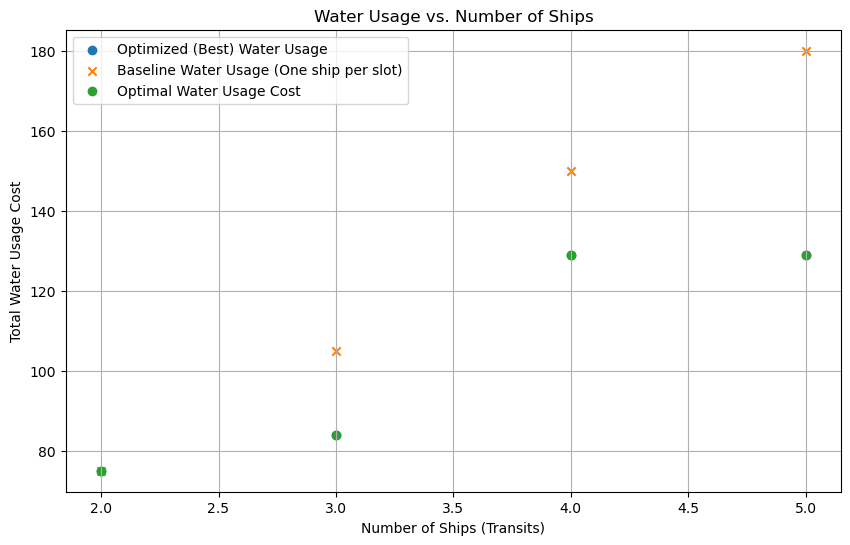

In [4]:
# Plot Reults of Experiment
plot(instance_sizes, best_water_costs, baseline_costs, optimal_water)